<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/HW5/HW5_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW5: Random Forest**
---

##**Task 0.1: Introductory Research Reading and Summarization**
---

#####**Research:** "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" Roth et al. 2019

#####**Description of Analytical Methods and Goals:**
#####The research objective is centered around the idea of energy sustainability in urban settings, the efficacy of sustainable planning, and subsequent challenges that face the measured impact of such policy implementation. Specifically, this paper looks at potential data fields that display relational significance with total energy output. Understanding the impact of these variables will allow for more accurate benchmark measurement across cities, improving data collection that is necessary to create actionable policy. Additionally, the research focuses on the use of open data models and the associated cost of such energy production - monetary value is heavily scrutinized while sustainability is considered more leniently.
#####The research method, while it is not explicitly defined, is referenced in its described analysis of data field importance in relation to overall energy output.

##**Task 0.2: Gathering Data from Repository**
---

In [3]:
import pandas as pd
import numpy as np

In [4]:
DC = pd.read_csv("https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/DC/DC_final.csv?raw=true")

In [5]:
print("there are (rows, columns) = ", (DC.shape), "in the dataframe")

there are (rows, columns) =  (1455, 23) in the dataframe


In [6]:
DC.columns

Index(['Unnamed: 0', 'report_status', 'ward', 'postal_code', 'year_built',
       'primary_ptype_self', 'primary_ptype_epa', 'tax_record_floor_area',
       'reported_gross_floor_area', 'water_use', 'metered_areas_energy',
       'metered_areas_water', 'electricity_use', 'natural_gas_use',
       'energy_star_score', 'site_eui', 'weather_norm_site_eui', 'source_eui',
       'weather_norm_source_eui', 'total_ghg_emissions',
       'total_ghg_emissions_intensity', 'total_site_energy_KBTU',
       'log_total_site_energy_KBTU'],
      dtype='object')

In [7]:
DC.describe()

,Unnamed: 0,ward,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,total_site_energy_KBTU,log_total_site_energy_KBTU
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1.455000e+03,1.441000e+03,1.054000e+03,1184.000000,1455.000000,1393.000000,1455.000000,1393.000000,1454.000000,1454.000000,1.455000e+03,1455.000000
mean,793.997938,3.472852,1940.804811,2.046748e+05,1.897612e+05,5.109905e+04,2.760114e+06,5.853217e+04,62.090372,69.960206,70.745154,171.274433,171.302872,1318.734388,6.674278,1.344870e+07,15.905810
std,469.582655,2.047691,167.230361,2.451302e+05,2.436786e+05,6.163321e+05,4.599984e+06,2.617060e+05,26.792483,30.676317,31.476591,76.707287,76.884877,2458.471157,3.143349,2.843799e+07,0.991320
min,1.000000,1.000000,1000.000000,9.171000e+03,9.171000e+03,0.000000e+00,1.785000e+02,0.000000e+00,1.000000,1.100000,1.100000,1.200000,1.200000,3.100000,0.100000,5.729350e+04,10.955942
25%,380.500000,2.000000,1947.000000,7.164000e+04,7.111750e+04,1.958050e+03,7.435930e+05,1.121760e+04,43.750000,51.600000,51.900000,121.850000,121.600000,400.450000,4.800000,4.513227e+06,15.322523
50%,794.000000,2.000000,1971.000000,1.287720e+05,1.215530e+05,4.063800e+03,1.612028e+06,2.770698e+04,70.000000,65.900000,66.600000,163.300000,163.400000,757.100000,6.300000,8.156027e+06,15.914268
75%,1176.500000,5.000000,1994.000000,2.585310e+05,2.372130e+05,7.008700e+03,3.386553e+06,5.154631e+04,84.000000,82.850000,84.500000,206.450000,207.400000,1534.450000,7.800000,1.565570e+07,16.566343
max,2181.000000,8.000000,2017.000000,3.997572e+06,5.634890e+06,1.929391e+07,1.207430e+08,7.269109e+06,100.000000,213.600000,215.500000,618.600000,620.600000,64992.500000,30.600000,7.832497e+08,20.478962


##**Task 1: Clean the Data**
---

In [8]:
# summarize the number of rows with missing values for each column
for c in DC.columns:

  # count number of rows with missing values
  n_miss = DC[c].isnull().sum()
  perc = n_miss / DC.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, DC[c].dtype,
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
ward (int64):  Missing: 0 (0.0%)
postal_code (object):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 14 (1.0%)
natural_gas_use (float64):  Missing: 401 (27.6%)
energy_star_score (float64):  Missing: 271 (18.6%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 62 (4.3%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 62 (4.3%)
total_ghg_emissions (float64):  Missing: 1 (0.1%)
total_ghg_emissions_intensity (float64):  Missing: 1 (0.1%)
total_site_energy_

In [9]:
#removing features that had missing values for greater than 40% of the buildings in the dataset
for c in DC.columns:

  # count number of rows with missing values
  n_miss = DC[c].isnull().sum()
  perc = n_miss / DC.shape[0] * 100
  if perc > 40:
    DC.drop(c, axis=1, inplace=True)

#cleaned the datasets by removing irrelevant building-identifying features
DC.drop(['ward', 'postal_code'], axis=1, inplace=True)
#cleaned the datasets by removing indescript/redundant features
DC.drop(['Unnamed: 0', 'report_status'], axis=1, inplace=True)

print("there are (rows, columns) = ", (DC.shape), "in the dataframe")

there are (rows, columns) =  (1455, 19) in the dataframe


In [10]:
for c in DC.columns:

  # count number of rows with missing values
  n_miss = DC[c].isnull().sum()
  perc = n_miss / DC.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, DC[c].dtype,
                                                  n_miss, perc))

year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 14 (1.0%)
natural_gas_use (float64):  Missing: 401 (27.6%)
energy_star_score (float64):  Missing: 271 (18.6%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 62 (4.3%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 62 (4.3%)
total_ghg_emissions (float64):  Missing: 1 (0.1%)
total_ghg_emissions_intensity (float64):  Missing: 1 (0.1%)
total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
log_total_site_energy_KBTU (float64):  Missing: 0 (0.0%)


##**Task 2: Transform Input Feature as Needed**
---

In [11]:
DC.describe()

,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,total_site_energy_KBTU,log_total_site_energy_KBTU
count,1455.000000,1.455000e+03,1.455000e+03,1.455000e+03,1.441000e+03,1.054000e+03,1184.000000,1455.000000,1393.000000,1455.000000,1393.000000,1454.000000,1454.000000,1.455000e+03,1455.000000
mean,1940.804811,2.046748e+05,1.897612e+05,5.109905e+04,2.760114e+06,5.853217e+04,62.090372,69.960206,70.745154,171.274433,171.302872,1318.734388,6.674278,1.344870e+07,15.905810
std,167.230361,2.451302e+05,2.436786e+05,6.163321e+05,4.599984e+06,2.617060e+05,26.792483,30.676317,31.476591,76.707287,76.884877,2458.471157,3.143349,2.843799e+07,0.991320
min,1000.000000,9.171000e+03,9.171000e+03,0.000000e+00,1.785000e+02,0.000000e+00,1.000000,1.100000,1.100000,1.200000,1.200000,3.100000,0.100000,5.729350e+04,10.955942
25%,1947.000000,7.164000e+04,7.111750e+04,1.958050e+03,7.435930e+05,1.121760e+04,43.750000,51.600000,51.900000,121.850000,121.600000,400.450000,4.800000,4.513227e+06,15.322523
50%,1971.000000,1.287720e+05,1.215530e+05,4.063800e+03,1.612028e+06,2.770698e+04,70.000000,65.900000,66.600000,163.300000,163.400000,757.100000,6.300000,8.156027e+06,15.914268
75%,1994.000000,2.585310e+05,2.372130e+05,7.008700e+03,3.386553e+06,5.154631e+04,84.000000,82.850000,84.500000,206.450000,207.400000,1534.450000,7.800000,1.565570e+07,16.566343
max,2017.000000,3.997572e+06,5.634890e+06,1.929391e+07,1.207430e+08,7.269109e+06,100.000000,213.600000,215.500000,618.600000,620.600000,64992.500000,30.600000,7.832497e+08,20.478962


---
#####**Q: What should you look at in the result?**
#####The describe function tells us the number of data points for each variable, indicating the absence or presence of missing data, as well as the mean and standard deviation, which gives insight into the spread/variability of the variables.
---

In [12]:
DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year_built                     1455 non-null   int64  
 1   primary_ptype_self             1455 non-null   object 
 2   primary_ptype_epa              1455 non-null   object 
 3   tax_record_floor_area          1455 non-null   float64
 4   reported_gross_floor_area      1455 non-null   float64
 5   water_use                      1455 non-null   float64
 6   metered_areas_energy           1455 non-null   object 
 7   metered_areas_water            1455 non-null   object 
 8   electricity_use                1441 non-null   float64
 9   natural_gas_use                1054 non-null   float64
 10  energy_star_score              1184 non-null   float64
 11  site_eui                       1455 non-null   float64
 12  weather_norm_site_eui          1393 non-null   f

---
#####**Q: Why is this helpful to print?**
#####The 'info' function delineates the number of non-null data points for each column, indicating the absence or presence of missing data. It also provides the type of data points within in each column. For instance, 'year_built' is dtype 'int64' because years are recorded as whole numbers, 'primary_ptype_self' is dtype 'object' because it is a string variable that provides a characterization of the building ('Office', 'Multifamily Housing', etc.), and 'tax_record_floor_area' is dtype 'float64' because it is a measured value that is expressed as in a decimal format.
---

###**Throw Away Data Where the Target Variable is Missing**
---

In [13]:
DC["total_site_energy_KBTU"].isna().sum()

0

In [14]:
original_len = DC.shape[0]
DC.dropna(subset=['total_site_energy_KBTU']) #, ... #... # replace ... with your code

print("I lost {:.2f}% of the data".format((1 - (DC.shape[0] / original_len)) * 100))

I lost 0.00% of the data


In [15]:
# isolate the target variable first (endogenous)
y = DC['total_site_energy_KBTU'].values

In [16]:
# and the input variables (exogenous)
X = DC.drop('total_site_energy_KBTU', axis=1)

###**Separate Categorical and Numerical Values**
---

In [17]:
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [18]:
X_numeric_data.shape

(1455, 14)

In [19]:
X_numeric_data.head()

,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,log_total_site_energy_KBTU
0,1959,63227.0,65000.0,6963.5,633043.8,44274.18307,9.0,101.3,102.7,175.9,174.9,482.9,7.4,15.700229
1,1997,251557.0,257943.0,8490.0,5531486.0,NaN,69.0,73.2,73.2,229.8,229.8,2164.4,8.4,16.753689
2,1964,330550.0,223218.0,8749.1,3863003.0,64143.38666,76.0,87.8,89.0,215.6,215.0,1852.2,8.3,16.790966
3,1969,256839.0,213067.0,5393.8,2936445.0,NaN,87.0,47.0,46.4,147.7,145.8,1249.2,5.9,16.119510
4,1975,370000.0,381518.0,10422.6,7345290.0,NaN,85.0,65.7,65.7,206.3,206.3,2874.1,7.5,17.037012


In [20]:
X_categorical_data.shape

(1455, 4)

###**TASK 2.1: Make a Scatter Plot to Assess Covariance of Numerical Variables**
---

In [21]:
import seaborn as sns
#sns.pairplot(X_numeric_data)

####**Figure 2.1:** Plot of pairwise relationships from dataset.


---
####**Q1: What are the collinear variables from the dataset?**
Based on the pairplot, 'site_eui' is collinear with 'weather_norm_sitee_eui', and 'source_eui' is collinear with 'weather_norm_source_eui'.

####**Q2: What other variables should be removed? Provide reasoning and explanation for each of your choices.**

#####From the DC dataset, the only other variables that I've identified with somewhat linear relationship are 'source_eui'/'weather_norm_source_eui' and 'total_ghg_emissions_intensity'. There are a number of outliers between the two variables and a marginally subinear relationship, but it *might* be reasonable to remove the 'total_ghg_emissions_intensity' to mitigate duplicity. Additionally, the intensity of the greenhouse gas emissions is not listed as an 'Energy Variable' in the reseach paper's summary of 10 higher-level variables while GHG emissions is a higher-level variable that is included in the dataset.
---

In [22]:
X_numeric_data.drop(['weather_norm_site_eui', 'weather_norm_source_eui'], axis=1, inplace=True)

In [23]:
X_numeric_data.columns

Index(['year_built', 'tax_record_floor_area', 'reported_gross_floor_area',
       'water_use', 'electricity_use', 'natural_gas_use', 'energy_star_score',
       'site_eui', 'source_eui', 'total_ghg_emissions',
       'total_ghg_emissions_intensity', 'log_total_site_energy_KBTU'],
      dtype='object')

In [24]:
X_numeric_data.describe()

,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,source_eui,total_ghg_emissions,total_ghg_emissions_intensity,log_total_site_energy_KBTU
count,1455.000000,1.455000e+03,1.455000e+03,1.455000e+03,1.441000e+03,1.054000e+03,1184.000000,1455.000000,1455.000000,1454.000000,1454.000000,1455.000000
mean,1940.804811,2.046748e+05,1.897612e+05,5.109905e+04,2.760114e+06,5.853217e+04,62.090372,69.960206,171.274433,1318.734388,6.674278,15.905810
std,167.230361,2.451302e+05,2.436786e+05,6.163321e+05,4.599984e+06,2.617060e+05,26.792483,30.676317,76.707287,2458.471157,3.143349,0.991320
min,1000.000000,9.171000e+03,9.171000e+03,0.000000e+00,1.785000e+02,0.000000e+00,1.000000,1.100000,1.200000,3.100000,0.100000,10.955942
25%,1947.000000,7.164000e+04,7.111750e+04,1.958050e+03,7.435930e+05,1.121760e+04,43.750000,51.600000,121.850000,400.450000,4.800000,15.322523
50%,1971.000000,1.287720e+05,1.215530e+05,4.063800e+03,1.612028e+06,2.770698e+04,70.000000,65.900000,163.300000,757.100000,6.300000,15.914268
75%,1994.000000,2.585310e+05,2.372130e+05,7.008700e+03,3.386553e+06,5.154631e+04,84.000000,82.850000,206.450000,1534.450000,7.800000,16.566343
max,2017.000000,3.997572e+06,5.634890e+06,1.929391e+07,1.207430e+08,7.269109e+06,100.000000,213.600000,618.600000,64992.500000,30.600000,20.478962


In [25]:
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (1455, 12) in the numerical variables


In [26]:
#recheck missing values
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 688 missing or infinity values in the numerical data


In [27]:
#convert to log values

X_numeric_data['log_floor_area_tax'] = np.log10(X_numeric_data['tax_record_floor_area'])
X_numeric_data['log_floor_area_reported'] = np.log10(X_numeric_data['reported_gross_floor_area'])
X_numeric_data['log_water_use'] = np.log10(X_numeric_data['water_use'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 2


In [29]:
X_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [30]:
print("the numerical data contains (rows, columns) = ", X_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (1455, 15)
there are 690 missing values in the numerical data


##**TASK 2.2 Use Nearest Neighbor Imputer to Impute Missing Values in Numerical Features**
---

In [31]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights='distance')
Xn = imputer.fit_transform(X_numeric_data)
Xn

array([[1.95900000e+03, 6.32270000e+04, 6.50000000e+04, ...,
        4.80090258e+00, 4.81291336e+00, 3.84282758e+00],
       [1.99700000e+03, 2.51557000e+05, 2.57943000e+05, ...,
        5.40063641e+00, 5.41152375e+00, 3.92890769e+00],
       [1.96400000e+03, 3.30550000e+05, 2.23218000e+05, ...,
        5.51923716e+00, 5.34872921e+00, 3.94196338e+00],
       ...,
       [2.01400000e+03, 1.96755000e+05, 1.96755000e+05, ...,
        5.29392578e+00, 5.29392578e+00, 4.04451624e+00],
       [1.97900000e+03, 1.09527500e+06, 1.45000000e+05, ...,
        6.03952317e+00, 5.16136800e+00, 4.15285378e+00],
       [1.99400000e+03, 1.90514000e+05, 2.25000000e+05, ...,
        5.27992690e+00, 5.35218252e+00, 4.11694628e+00]])

##**Task 2.3: Impute Missing Categorical Variables**
---

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent').set_output(transform='pandas')
Xc = imputer.fit_transform(X_categorical_data)
Xc

,primary_ptype_self,primary_ptype_epa,metered_areas_energy,metered_areas_water
0,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building
1,Office,Office,Whole Building,Whole Building
2,Office,Office,Whole Building,Whole Building
3,Office,Office,Whole Building,Whole Building
4,Office,Office,Whole Building,Whole Building
...,...,...,...,...
1450,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building
1451,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building
1452,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building
1453,College/University,Other,Whole Building,Whole Building


##**Task 3: One Hot Encode the Categorical Variables**
---

In [33]:
X_categorical_data.describe()

,primary_ptype_self,primary_ptype_epa,metered_areas_energy,metered_areas_water
count,1455,1455,1455,1455
unique,45,45,3,3
top,Office,Multifamily Housing,Whole Building,Whole Building
freq,490,485,1434,1434


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder(handle_unknown='ignore') # wise to set this: it means if there is an category that is causing an error the code wont break
ohe.fit(Xc) # this is the full feature set: it does not have to be
ohe.categories_ # tells you which ones are the variables that will be transformed to one-hot

[array(['Adult Education', 'College/University', 'Distribution Center',
        'Enclosed Mall', 'Financial Office', 'Fire Station',
        'Fitness Center/Health Club/Gym', 'Food Service',
        'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
        'Laboratory', 'Library', 'Manufacturing/Industrial Plant',
        'Medical Office', 'Mixed Use Property', 'Movie Theater',
        'Multifamily Housing', 'Museum', 'Non-Refrigerated Warehouse',
        'Office', 'Other', 'Other - Education',
        'Other - Entertainment/Public Assembly',
        'Other - Lodging/Residential', 'Other - Mall',
        'Other - Public Services', 'Other - Recreation',
        'Other - Specialty Hospital',
        'Outpatient Rehabilitation/Physical Therapy', 'Performing Arts',
        'Police Station', 'Pre-school/Daycare', 'Prison/Incarceration',
        'Repair Services (Vehicle Shoe Locksmith etc.)',
        'Residence Hall/Dormitory', 'Retail Store',
        'Self-Storage Facility',

In [36]:
Xc = ohe.fit_transform(Xc).toarray()

In [37]:
ohe.inverse_transform(Xc)

array([['Multifamily Housing', 'Multifamily Housing', 'Whole Building',
        'Whole Building'],
       ['Office', 'Office', 'Whole Building', 'Whole Building'],
       ['Office', 'Office', 'Whole Building', 'Whole Building'],
       ...,
       ['Multifamily Housing', 'Multifamily Housing', 'Whole Building',
        'Whole Building'],
       ['College/University', 'Other', 'Whole Building',
        'Whole Building'],
       ['Residence Hall/Dormitory', 'Residence Hall/Dormitory',
        'Whole Building', 'Whole Building']], dtype=object)

In [38]:
Xc = pd.DataFrame(Xc, columns=ohe.get_feature_names_out())

In [39]:
Xc.shape

(1455, 96)

In [40]:
#get the name of features after encoding
feature_name_cat = ohe.get_feature_names_out()
feat = np.append(X_numeric_data.columns.values, feature_name_cat)

##**Task 4: Recombine your Numerical and Categorical Imput Features and Split your Data into Training and Testing**
---

In [41]:
Xn.shape

(1455, 15)

In [42]:
Xc.shape

(1455, 96)

In [43]:
X = np.hstack([Xn, Xc])
X.shape

(1455, 111)

In [51]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 111 features (!!!)


In [44]:
# make a train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##**Task 5: Run a Random Forest Regression Model**
---

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf_train = rf.fit(X_train, y_train)

In [46]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.59


In [47]:
rf.feature_importances_[:10]

array([0.00493219, 0.00248458, 0.01883592, 0.0094377 , 0.13432378,
       0.15372729, 0.00359359, 0.00455294, 0.0007781 , 0.05609324])

In [48]:
#feat = np.append(X_numeric_data.columns.values, feature_name_cat)
feature_names = feat
len(feature_names)

111

In [49]:
feature_array = []
for feat_names, importances in zip(feat, rf.feature_importances_):
    feature_array.append([feat_names, importances])

feature_array.sort(key=lambda x: x[1], reverse=True)
feature_array = feature_array[:50]

feature_names = np.array([subarray[0] for subarray in feature_array])
tree_feature_importances = np.array([subarray[1] for subarray in feature_array])

<ipython-input-50-7aaade824640>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


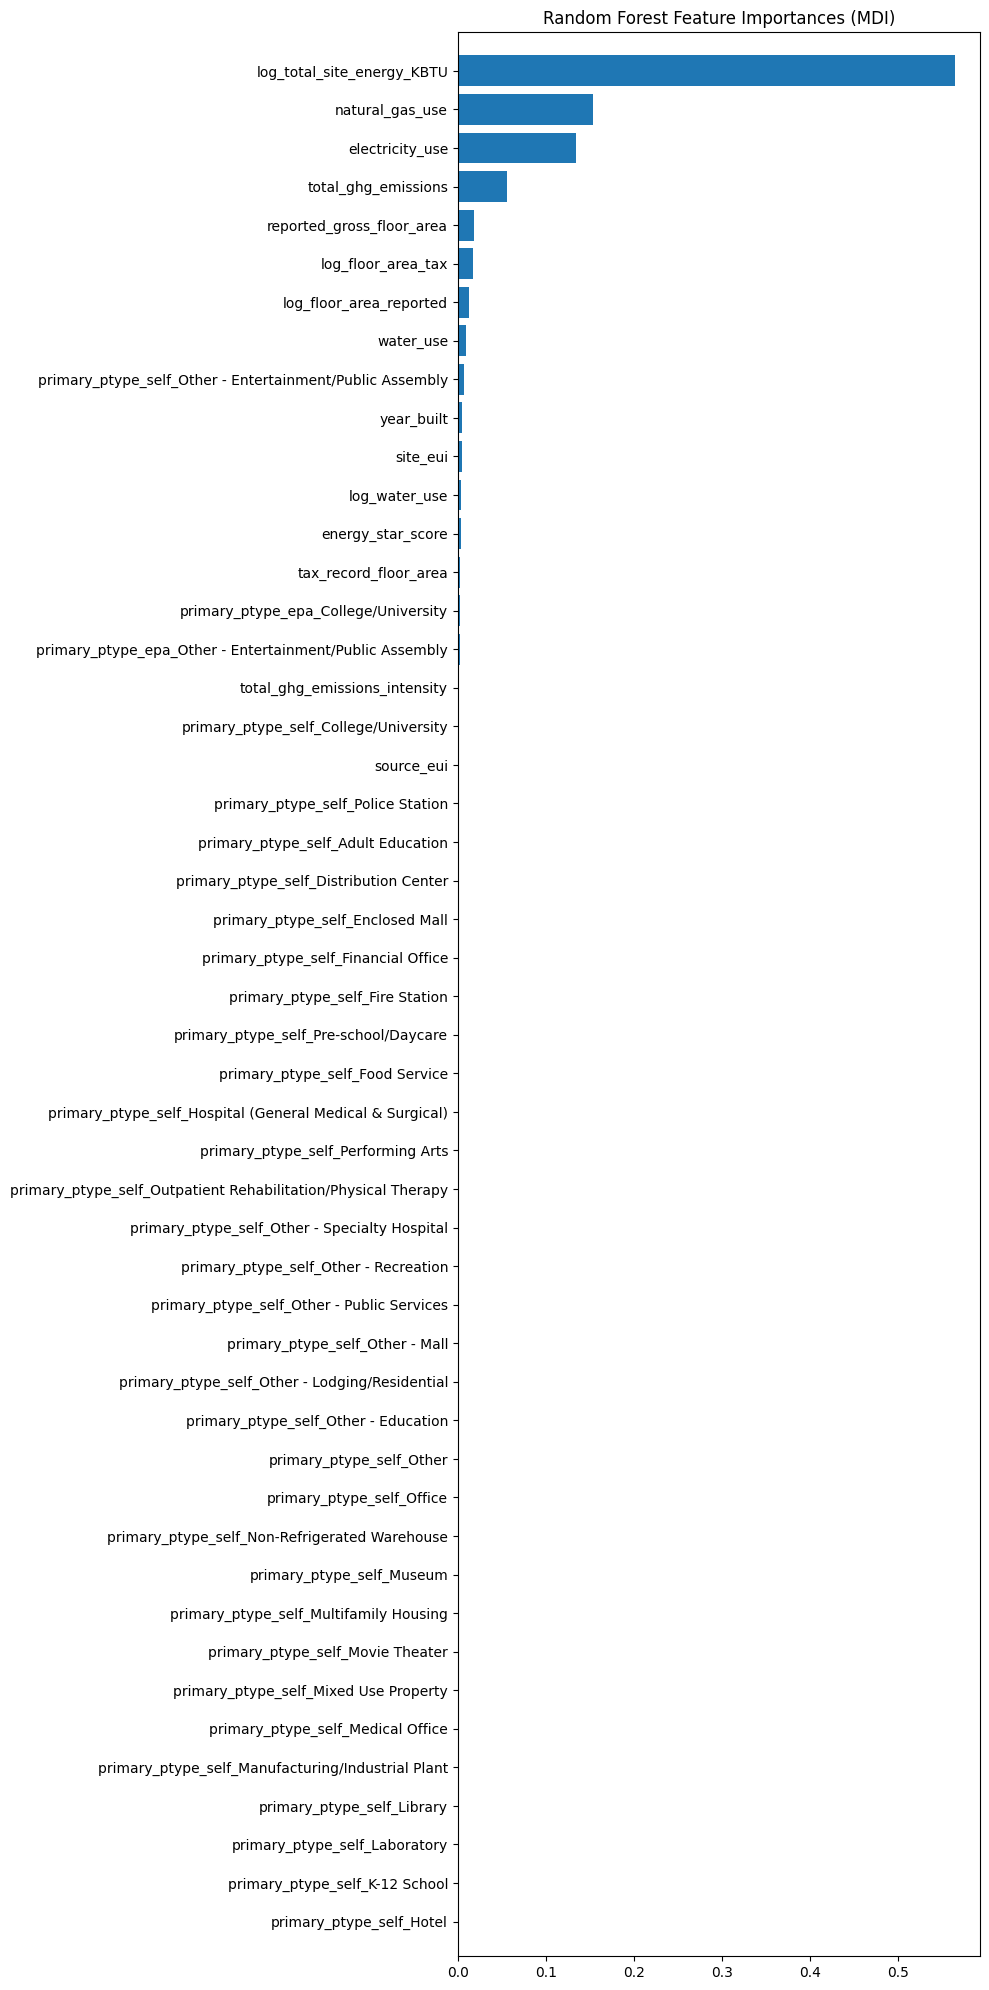

In [50]:
#plotting the top ~50 features (non-zero variables)
import pylab as plt

sorted_idx = np.argsort(tree_feature_importances)

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(0.1, len(feature_names))
plt.show()

####**Figure 5.1:** Feature Importance Model. The model supports the assumption of log total site energy as the most important feature with natural gas, electricity, and ghg emissions carrying the next highest scores. The result substantiates the relational importance of these factors with the site's total energy. An interesting aspect of this plot is the feature importance value of the categorical variable, Entertainment/Public Assembly, which indicates high energy contribution from this building classification.